In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.models import Sequential  #匯入Sequential模型和Dense層
from keras.layers import Dense


In [3]:
df = pd.read_csv('diabetes.csv')        #df means dataframe
dataset = df.values          #以矩陣形式呈現每一列
np.random.shuffle(dataset)   #亂數打散資料順序

In [4]:
X = dataset[:, 0:8]   #前8個欄位為特徵資料(資料共有9行)
Y = dataset[:, 8]     #最後1個欄位為目標標籤資料集

In [5]:
model = Sequential()   #建立Sequential物件
model.add(Dense(10, input_shape=(8,), activation="relu"))   #unit,input_shape,activation分別代表10個神經元、輸入資料維度15、激活函數用relu

In [6]:
model.add(Dense(8, activation="relu"))   #新增第2層隱藏層，8個神經元

In [7]:
model.add(Dense(1, activation="sigmoid")) #輸出層，Sigmoid

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])   #編譯模型         

In [10]:
model.fit(X, Y, epochs=150, batch_size=10)     #訓練模型（單次epoch=(全部訓練樣本/batchsize)/iteration=1）

Epoch 1/150
200/200 [==============================] - 0s 491us/step - loss: 5.1165 - accuracy: 0.6383
Epoch 2/150
200/200 [==============================] - 0s 446us/step - loss: 0.6401 - accuracy: 0.6617
Epoch 3/150
200/200 [==============================] - 0s 451us/step - loss: 0.5952 - accuracy: 0.6825
Epoch 4/150
200/200 [==============================] - 0s 436us/step - loss: 0.6062 - accuracy: 0.6694
Epoch 5/150
200/200 [==============================] - 0s 446us/step - loss: 0.6015 - accuracy: 0.6763
Epoch 6/150
200/200 [==============================] - 0s 431us/step - loss: 0.6006 - accuracy: 0.6802
Epoch 7/150
200/200 [==============================] - 0s 444us/step - loss: 0.6111 - accuracy: 0.6696
Epoch 8/150
200/200 [==============================] - 0s 456us/step - loss: 0.5910 - accuracy: 0.6834
Epoch 9/150
200/200 [==============================] - 0s 431us/step - loss: 0.5939 - accuracy: 0.6793
Epoch 10/150
200/200 [==============================] - 0s 431us/step - l

200/200 [==============================] - 0s 436us/step - loss: 0.5741 - accuracy: 0.7036
Epoch 80/150
200/200 [==============================] - 0s 431us/step - loss: 0.5636 - accuracy: 0.7016
Epoch 81/150
200/200 [==============================] - 0s 418us/step - loss: 0.5739 - accuracy: 0.7091
Epoch 82/150
200/200 [==============================] - 0s 421us/step - loss: 0.5682 - accuracy: 0.7012
Epoch 83/150
200/200 [==============================] - 0s 437us/step - loss: 0.5822 - accuracy: 0.6998
Epoch 84/150
200/200 [==============================] - 0s 424us/step - loss: 0.5698 - accuracy: 0.6985
Epoch 85/150
200/200 [==============================] - 0s 421us/step - loss: 0.5718 - accuracy: 0.6947
Epoch 86/150
200/200 [==============================] - 0s 426us/step - loss: 0.5675 - accuracy: 0.7265
Epoch 87/150
200/200 [==============================] - 0s 421us/step - loss: 0.5748 - accuracy: 0.7118
Epoch 88/150
200/200 [==============================] - 0s 421us/step - loss:

In [11]:
loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

63/63 [==============================] - 0s 579us/step - loss: 0.5708 - accuracy: 0.7030
loss = 0.57
準確度 = 0.70


In [12]:
X -= X.mean(axis=0)     #先減掉平均值，再除以標準差，可以將數值移位成平均值0，標準差1的資料分布
X /= X.std(axis=0)      

In [13]:
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

In [14]:
loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度提升到0.79！

63/63 [==============================] - 0s 540us/step - loss: 0.3597 - accuracy: 0.8350
loss = 0.36
準確度 = 0.83


In [15]:
from keras.utils import to_categorical  #進行 One-hot Encoding
Y = to_categorical(Y)

In [16]:
model = Sequential()
model.add(Dense(10, input_shape=(8, ), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))          #改用softmax

In [17]:
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度提升0.01至0.80！

63/63 [==============================] - 0s 563us/step - loss: 0.3880 - accuracy: 0.8210
loss = 0.39
準確度 = 0.82


In [18]:
#使用初始器

model = Sequential()


#kernal_initializer初始神經層的權重矩陣、bias_initializer初始偏向量的值(zeros代表0,ones代表1)

model.add(Dense(10, input_shape=(8, ),kernel_initializer="random_uniform",bias_initializer="ones",activation="relu"))
model.add(Dense(8, input_shape=(8, ),kernel_initializer="random_uniform",bias_initializer="ones",activation="relu"))
model.add(Dense(2, input_shape=(8, ),kernel_initializer="random_uniform",bias_initializer="ones",activation="softmax"))

In [19]:
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.78！

63/63 [==============================] - 0s 627us/step - loss: 0.4395 - accuracy: 0.7840
loss = 0.44
準確度 = 0.78


In [20]:
model.compile(loss="binary_crossentropy", optimizer="adam",  #優化器改成adam
              metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.80！

63/63 [==============================] - 0s 515us/step - loss: 0.3804 - accuracy: 0.8325
loss = 0.38
準確度 = 0.83


In [21]:
model.add(Dense(10, input_shape=(8, ),activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 14        
Total params: 306
Trainable params: 306
Non-trainable params: 0
________________________________________________________

In [22]:
model.compile(loss="binary_crossentropy", optimizer="adam",  #優化器改成adam
              metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.81！

63/63 [==============================] - 0s 579us/step - loss: 0.3642 - accuracy: 0.8420
loss = 0.36
準確度 = 0.84


In [23]:
X_train, Y_train = X[:690], Y[:690] #前690筆訓練資料
X_test, Y_test = X[690:], Y[690:] #後78筆訓練資料       #使用df.shape可看到資料總筆數

In [24]:
model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)

In [25]:
loss, accuracy = model.evaluate(X_train, Y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.83！
print("-------------------------------------------")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.81！

22/22 [==============================] - 0s 616us/step - loss: 0.3406 - accuracy: 0.8667
訓練資料集資訊：
loss = 0.34
準確度 = 0.87
-------------------------------------------
41/41 [==============================] - 0s 598us/step - loss: 0.3939 - accuracy: 0.8397
測試資料集資訊：
loss = 0.39
準確度 = 0.84


In [26]:
#驗證資料集

history = model.fit(X_train, Y_train,
                    validation_data = (X_test, Y_test),
                    epochs=150, batch_size=10)

Epoch 1/150
69/69 [==============================] - 1s 12ms/step - loss: 0.3477 - accuracy: 0.8551 - val_loss: 0.3856 - val_accuracy: 0.8351
Epoch 2/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8667 - val_loss: 0.3867 - val_accuracy: 0.8359
Epoch 3/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8681 - val_loss: 0.3870 - val_accuracy: 0.8351
Epoch 4/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8623 - val_loss: 0.3922 - val_accuracy: 0.8328
Epoch 5/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8551 - val_loss: 0.3995 - val_accuracy: 0.8351
Epoch 6/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8594 - val_loss: 0.3906 - val_accuracy: 0.8458
Epoch 7/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8580 - val_loss: 0.3823 - val_accuracy: 0.8504
Epoch 8/150


Epoch 59/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8652 - val_loss: 0.3910 - val_accuracy: 0.8282
Epoch 60/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8696 - val_loss: 0.3924 - val_accuracy: 0.8382
Epoch 61/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8594 - val_loss: 0.3900 - val_accuracy: 0.8374
Epoch 62/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8623 - val_loss: 0.3917 - val_accuracy: 0.8359
Epoch 63/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8551 - val_loss: 0.3867 - val_accuracy: 0.8321
Epoch 64/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8739 - val_loss: 0.3887 - val_accuracy: 0.8382
Epoch 65/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8768 - val_loss: 0.3903 - val_accuracy: 0.8313
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8638 - val_loss: 0.3901 - val_accuracy: 0.8344
Epoch 117/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8739 - val_loss: 0.3864 - val_accuracy: 0.8336
Epoch 118/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8609 - val_loss: 0.3840 - val_accuracy: 0.8389
Epoch 119/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8681 - val_loss: 0.3907 - val_accuracy: 0.8397
Epoch 120/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8667 - val_loss: 0.3864 - val_accuracy: 0.8328
Epoch 121/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8681 - val_loss: 0.3918 - val_accuracy: 0.8389
Epoch 122/150
69/69 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8652 - val_loss: 0.3917 - val_accuracy: 0.8382
Epoch 123/150

In [27]:
loss, accuracy = model.evaluate(X_train, Y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.84！
print("-------------------------------------------")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.79！

22/22 [==============================] - 0s 570us/step - loss: 0.3303 - accuracy: 0.8812
訓練資料集資訊：
loss = 0.33
準確度 = 0.88
-------------------------------------------
41/41 [==============================] - 0s 598us/step - loss: 0.3872 - accuracy: 0.8519
測試資料集資訊：
loss = 0.39
準確度 = 0.85


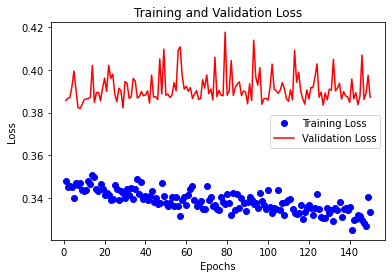

In [28]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label ="Training Loss")
plt.plot(epochs, val_loss, "r", label ="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [29]:
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-", label ="Training Acc")
plt.plot(epochs, val_acc, "r--", label ="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

KeyError: 'acc'

In [29]:
history = model.fit(X_train, Y_train, validation_split=0.2,   #自動切割成80:20
                    epochs=14, batch_size=10)

Epoch 1/14
56/56 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8768 - val_loss: 0.3153 - val_accuracy: 0.8768
Epoch 2/14
56/56 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8786 - val_loss: 0.3534 - val_accuracy: 0.8261
Epoch 3/14
56/56 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8678 - val_loss: 0.3273 - val_accuracy: 0.8478
Epoch 4/14
56/56 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8768 - val_loss: 0.3292 - val_accuracy: 0.8696
Epoch 5/14
56/56 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8732 - val_loss: 0.3271 - val_accuracy: 0.8768
Epoch 6/14
56/56 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8641 - val_loss: 0.3274 - val_accuracy: 0.8551
Epoch 7/14
56/56 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8696 - val_loss: 0.3350 - val_accuracy: 0.8261
Epoch 8/14
56/56 [==

In [30]:
loss, accuracy = model.evaluate(X_train, Y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.82！
print("-------------------------------------------")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.81！

#Training loss和Validation loss相當接近，準確度只差0.01

22/22 [==============================] - 0s 570us/step - loss: 0.3244 - accuracy: 0.8725
訓練資料集資訊：
loss = 0.32
準確度 = 0.87
-------------------------------------------
41/41 [==============================] - 0s 499us/step - loss: 0.3804 - accuracy: 0.8366
測試資料集資訊：
loss = 0.38
準確度 = 0.84


In [31]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict_classes(X_test, batch_size=10, verbose=0)
print(Y_pred[0], Y_pred[1])  #第0筆不會得糖尿病、第1筆會得糖尿病

22/22 [==============================] - 0s 665us/step - loss: 0.4578 - accuracy: 0.7783
訓練資料集的準確度 = 0.78
41/41 [==============================] - 0s 474us/step - loss: 0.4883 - accuracy: 0.7580
測試資料集的準確度 = 0.76
[0] [1]


C:\Users\Hsieh73\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
